# Определение перспективного тарифа для телеком-компании

Клиентам предлагаются два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 

Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Требуется проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

**Цель исследования** - Для корректировки рекламного бюджета определить какой тариф приносит больше денег(«Смарт» или «Ультра»).

Проверить две гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

Данные для исследования мы получим пятью файлами:

* /datasets/calls.csv. - информация о звонках;
* /datasets/internet.csv. - информация об интернет-сессиях;
* /datasets/messages.csv. - информация о сообщениях;
* /datasets/tariffs.csv. - информация о тарифах;
* /datasets/users.csv. - информация о пользователях.

## Изучение данных из файлов

In [1]:
# импортируем библиотеку для работы с файлами csv  формата
import pandas as pd

In [2]:
# проверка файла и всех его атрибутов
calls = pd.read_csv('/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


При изучении этого файла наблюдается отсутствие пропусков, но есть вопросы в типах данных, к ним мы вернемся в разделе предобработка данных.

In [3]:
# проверка файла и всех его атрибутов
internet = pd.read_csv('/datasets/internet.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Аналогично прошлому файлу проблемы пока наблюдаются только типах данных.

In [4]:
# проверка файла и всех его атрибутов
messages = pd.read_csv('/datasets/messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Аналогично прошлому файлу.

In [5]:
# проверка файла и всех его атрибутов
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Аналогично прошлому файлу.

In [6]:
# проверка файла и всех его атрибутов
users = pd.read_csv('/datasets/users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Видим пропуски в столбце `churn_date`, они означают то, что тариф ещё действовал на момент выгрузки данных, так что просто заменим их на ...

**Вывод:**
* Проблем с пропусками во всех файлах не наблюдается, нужно заменить пропуски лишь в одном столбце.
* Наблюдаем проблемы с типами данных, во многих столбиках, в разных файлах стоят неверные типы данных.
* Следует так же проверить наши файлы на дубликаты, аномалии или неточности, а так же на остальные проблемы, займемся же этим.

## Предобработка данных

### Для начала исправим все типы данных в наших файлах.

In [7]:
# посмотрим первую таблицу
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [8]:
# исправим неверные типы данных в 1 файле
calls['id'] = calls['id'].astype('int64')
calls['call_date'] = calls['call_date'].astype('datetime64')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.2 MB


Можем наблюдать, что типы были заменены успешно.

In [9]:
# посмотрим вторую таблицу
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [10]:
# исправим неверные типы данных в 2 файле
internet['id'] = internet['id'].astype('int64')
internet['mb_used'] = internet['mb_used'].astype('int64')
internet['session_date'] = internet['session_date'].astype('datetime64')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  int64         
 2   mb_used       149396 non-null  int64         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 5.7 MB


In [11]:
# посмотрим третью таблицу
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [12]:
# исправим неверные типы данных в 3 файле
messages['id'] = messages['id'].astype('int64')
messages['message_date'] = messages['message_date'].astype('datetime64')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


In [13]:
# посмотрим четвертую таблицу
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
# переименуем название последнего столбца
tariffs = tariffs.rename(columns = {'tariff_name': 'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В этом файле все впорядке с типами данных!

In [15]:
# посмотрим пятую таблицу
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [16]:
# исправим неверные типы данных в 5 файле
users['reg_date'] = users['reg_date'].astype('datetime64')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


**Вывод:** Мы обнаружили и исправили все типы данных, самое время заняться пропусками.
    P.S. В файле `users`, в столбце `churn_date` специально не изменил тип данных, так как в последующем вместо пропусков буду ставить текстовые значения.

### Заполнение пропусков.

Проблема с пропусками возникла лишь в файле под названием `users`, за место пропусков следует ввести надпись "current tariff", что означает, что тариф еще действовал на момент прекращения пользования.

In [17]:
# заполняем пропуски 
users['churn_date'] = users['churn_date'].fillna('current tariff')
users['churn_date']

0      current tariff
1      current tariff
2      current tariff
3      current tariff
4      current tariff
            ...      
495    current tariff
496    current tariff
497    current tariff
498        2018-10-25
499    current tariff
Name: churn_date, Length: 500, dtype: object

Видим что пропуски заполнились нужным нам значением.

### Проверим наши файлы на дубликаты.

In [18]:
# проверка на дубликаты 
calls.duplicated().sum()

0

In [19]:
# проверка на дубликаты 
internet.duplicated().sum()

0

In [20]:
# проверка на дубликаты 
messages.duplicated().sum()

0

In [21]:
# проверка на дубликаты 
tariffs.duplicated().sum()

0

In [22]:
# проверка на дубликаты 
users.duplicated().sum()

0

Отлично, строк дубликатов не обнаружено!

In [23]:
# создадим цикл, который переберет все столбцы в 1 файле
for column_name in calls.columns:
    display(calls[column_name].value_counts())

1054723    1
141550     1
134594     1
1243380    1
1239286    1
          ..
1428207    1
1391345    1
1385202    1
1381108    1
1054717    1
Name: id, Length: 202607, dtype: int64

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [24]:
# создадим цикл, который переберет все столбцы в 2 файле
for column_name in internet.columns:
    display(internet[column_name].value_counts())

0        1
88702    1
58057    1
64202    1
62155    1
        ..
58678    1
60727    1
38200    1
40249    1
2047     1
Name: Unnamed: 0, Length: 149396, dtype: int64

10245      1
137878     1
1002172    1
1000125    1
1006270    1
          ..
1226108    1
1228157    1
1484158    1
1486207    1
137656     1
Name: id, Length: 149396, dtype: int64

0       19699
332       231
381       229
376       222
252       222
        ...  
1397        1
1385        1
1579        1
1525        1
1401        1
Name: mb_used, Length: 1421, dtype: int64

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-02       3
2018-01-01       3
Name: session_date, Length: 365, dtype: int64

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

In [25]:
# создадим цикл, который переберет все столбцы в 3 файле
for column_name in messages.columns:
    display(messages[column_name].value_counts())

1056207    1
1496335    1
1344453    1
1356739    1
1096642    1
          ..
1344954    1
1433381    1
1375669    1
1099186    1
10235      1
Name: id, Length: 123036, dtype: int64

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-07     12
2018-01-05     10
2018-01-02     10
2018-01-04     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1111       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

In [26]:
# создадим цикл, который переберет все столбцы в 4 файле
for column_name in tariffs.columns:
    display(tariffs[column_name].value_counts())

1000    1
50      1
Name: messages_included, dtype: int64

15360    1
30720    1
Name: mb_per_month_included, dtype: int64

500     1
3000    1
Name: minutes_included, dtype: int64

1950    1
550     1
Name: rub_monthly_fee, dtype: int64

200    1
150    1
Name: rub_per_gb, dtype: int64

1    1
3    1
Name: rub_per_message, dtype: int64

1    1
3    1
Name: rub_per_minute, dtype: int64

ultra    1
smart    1
Name: tariff, dtype: int64

In [27]:
# создадим цикл, который переберет все столбцы в 5 файле
for column_name in users.columns:
    display(users[column_name].value_counts())

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

53    14
42    14
63    13
64    13
71    13
21    12
40    12
73    12
29    11
39    11
37    11
47    11
26    11
41    10
45    10
58    10
36    10
70    10
52    10
65     9
66     9
56     9
68     9
20     9
51     9
50     9
48     9
30     9
19     9
24     9
28     9
27     9
23     9
62     8
60     8
55     8
69     8
44     8
25     7
31     7
35     7
67     7
74     7
43     7
32     7
46     7
18     6
59     6
54     6
75     6
38     5
34     5
72     5
33     5
22     5
57     4
49     4
61     3
Name: age, dtype: int64

current tariff    462
2018-12-21          2
2018-10-03          2
2018-10-14          2
2018-12-09          2
2018-12-03          2
2018-11-13          1
2018-11-27          1
2018-08-31          1
2018-09-02          1
2018-12-16          1
2018-12-14          1
2018-10-05          1
2018-11-22          1
2018-12-18          1
2018-12-23          1
2018-12-25          1
2018-11-30          1
2018-12-11          1
2018-11-16          1
2018-09-27          1
2018-10-27          1
2018-12-20          1
2018-11-07          1
2018-12-24          1
2018-10-28          1
2018-09-26          1
2018-10-04          1
2018-12-30          1
2018-11-26          1
2018-08-17          1
2018-12-26          1
2018-10-25          1
2018-11-21          1
Name: churn_date, dtype: int64

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Химки               1
Архангельск         1
Иваново             1
Нижневартовск       1
Подольск            1
Name: city, Length: 76, dtype: int64

Радим       6
Пётр        5
Леонид      5
Мариетта    4
Лолита      4
           ..
Лукий       1
Элла        1
Тихон       1
Трофим      1
Эльвира     1
Name: first_name, Length: 246, dtype: int64

Андреенко    5
Аничкина     3
Соловьев     3
Анищенко     3
Аркадьев     3
            ..
Рябов        1
Костин       1
Селезнева    1
Алешкова     1
Сазонова     1
Name: last_name, Length: 419, dtype: int64

2018-05-28    8
2018-04-03    5
2018-01-04    5
2018-11-16    5
2018-10-05    5
             ..
2018-06-23    1
2018-12-25    1
2018-05-08    1
2018-06-08    1
2018-12-21    1
Name: reg_date, Length: 270, dtype: int64

smart    351
ultra    149
Name: tariff, dtype: int64

**Вывод:** В результате проверки наших файлов дубликаты не обнаружены.

### Проверка на аномалии и неточности.

In [28]:
# проверка 1 файла на ошибки
calls.describe()

,id,duration,user_id
count,2.026070e+05,202607.000000,202607.000000
mean,1.212254e+06,6.755887,1253.940619
std,1.725756e+06,5.843365,144.722751
min,1.000000e+04,0.000000,1000.000000
25%,1.012286e+06,1.300000,1126.000000
50%,1.179376e+06,6.000000,1260.000000
75%,1.358126e+06,10.700000,1379.000000
max,1.458115e+07,38.000000,1499.000000


In [29]:
# проверка 2 файла на ошибки
internet.describe()

,Unnamed: 0,id,mb_used,user_id
count,149396.000000,1.493960e+05,149396.000000,149396.000000
mean,74697.500000,8.968475e+05,369.762223,1252.099842
std,43127.054745,5.419758e+05,278.214201,144.050823
min,0.000000,1.000000e+04,0.000000,1000.000000
25%,37348.750000,1.389878e+05,138.000000,1130.000000
50%,74697.500000,1.145212e+06,348.000000,1251.000000
75%,112046.250000,1.321559e+06,559.000000,1380.000000
max,149395.000000,1.499156e+06,1724.000000,1499.000000


In [30]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,112,2018-11-25,1000
1,1,10001,1052,2018-09-07,1000
2,2,10002,1197,2018-06-25,1000
3,3,10003,550,2018-08-22,1000
4,4,10004,302,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499152,318,2018-10-03,1499
149392,149392,1499153,490,2018-12-14,1499
149393,149393,1499154,0,2018-10-27,1499
149394,149394,1499155,1246,2018-11-26,1499


In [31]:
# проверка 3 файла на ошибки
messages.describe()

,id,user_id
count,1.230360e+05,123036.000000
mean,1.144527e+06,1256.989410
std,1.717919e+06,143.523967
min,1.000000e+04,1000.000000
25%,1.418898e+05,1134.000000
50%,1.158504e+06,1271.000000
75%,1.343105e+06,1381.000000
max,1.433109e+07,1499.000000


In [32]:
# проверка 4 файла на ошибки
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [33]:
# проверка 5 файла на ошибки
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


**Вывод:** Безумно странно, но никаких ошибок не было найдено, все значения в столбцах нормальные и не противоречат логике.

In [34]:
del internet['Unnamed: 0']
internet = internet.query('mb_used != 0')
internet.query('mb_used == 0')
internet

,id,mb_used,session_date,user_id
0,10000,112,2018-11-25,1000
1,10001,1052,2018-09-07,1000
2,10002,1197,2018-06-25,1000
3,10003,550,2018-08-22,1000
4,10004,302,2018-09-24,1000
...,...,...,...,...
149390,1499151,752,2018-10-11,1499
149391,1499152,318,2018-10-03,1499
149392,1499153,490,2018-12-14,1499
149394,1499155,1246,2018-11-26,1499


## Подготовка данных

### Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

In [35]:
# добавим в таблицу `calls` столбец под названием `month`
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.00,1000,7
1,10001,2018-08-17,0.00,1000,8
2,10002,2018-06-11,2.85,1000,6
3,10003,2018-09-21,13.80,1000,9
4,10004,2018-12-15,5.18,1000,12


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Тут все хорошо. В качестве альтернативы можно было просто оставить номер месяца вместо буквенного названия. 
</div>

In [36]:
# создаем отдельную таблцу
user_calls = calls.groupby(['user_id', 'month'])\
              .agg({'duration': 'sum', 'id': 'count'})\
              .reset_index()\
              .rename(columns = {'duration': 'minutes_in_month', 'id': 'total_calls_in_month'})
user_calls.head()                        

,user_id,month,minutes_in_month,total_calls_in_month
0,1000,5,150.06,22
1,1000,6,158.90,43
2,1000,7,318.80,47
3,1000,8,389.87,52
4,1000,9,440.14,58


Отлично, была создана отдельная таблица для дальнейшего удобства в расчетах и выдвижения гипотез.

### Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [37]:
# добавим в таблицу `messages` столбец под названием `month`
messages['month'] = messages['message_date'].dt.month_name()
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,June
1,10001,2018-10-08,1000,October
2,10002,2018-08-04,1000,August
3,10003,2018-06-16,1000,June
4,10004,2018-12-05,1000,December


In [38]:
# создаем отдельную таблцу
user_messages = messages.groupby(['user_id', 'month'])\
              .agg({'id': 'count'})\
              .reset_index()\
              .rename(columns = {'id': 'sms_in_month'})
user_messages.head() 

,user_id,month,sms_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


Посчитали количество отправленных сообщений по месяцам для каждого пользователя.

### Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [39]:
# добавим в таблицу `internet` столбец под названием `month`
internet['month'] = internet['session_date'].dt.month_name()
internet.head()

/tmp/ipykernel_53/3910113174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet['month'] = internet['session_date'].dt.month_name()


,id,mb_used,session_date,user_id,month
0,10000,112,2018-11-25,1000,November
1,10001,1052,2018-09-07,1000,September
2,10002,1197,2018-06-25,1000,June
3,10003,550,2018-08-22,1000,August
4,10004,302,2018-09-24,1000,September


In [40]:
# создаем отдельную таблцу
user_internet = internet.groupby(['user_id', 'month'])\
              .agg({'mb_used': 'sum'})\
              .reset_index()\
              .rename(columns = {'mb_used': 'traffic_in_month'})
user_internet.head()

,user_id,month,traffic_in_month
0,1000,August,14043
1,1000,December,9808
2,1000,July,13988
3,1000,June,23213
4,1000,May,2252


Объем израсходанного интернет-трафика по месяцам расчитан.

### Посчитаем помесячную выручку с каждого пользователя.

In [41]:
user_calls['month'] = user_calls['month'].astype('object')

In [42]:
user_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3174 non-null   int64  
 1   month                 3174 non-null   object 
 2   minutes_in_month      3174 non-null   float64
 3   total_calls_in_month  3174 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 99.3+ KB


In [43]:
# склеим 3 наши таблицы в одну 
df = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')
df.head()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month
0,1000,5.0,150.06,22.0,NaN
1,1000,6.0,158.90,43.0,NaN
2,1000,7.0,318.80,47.0,NaN
3,1000,8.0,389.87,52.0,NaN
4,1000,9.0,440.14,58.0,NaN


In [44]:
# добавим таблицу израсходованного интернет-трафика
df = df.merge(user_internet, on=['user_id', 'month'], how='outer')
df.tail()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month,traffic_in_month
6383,1494,August,NaN,NaN,NaN,6580.0
6384,1494,December,NaN,NaN,NaN,17601.0
6385,1494,November,NaN,NaN,NaN,18034.0
6386,1494,October,NaN,NaN,NaN,17741.0
6387,1494,September,NaN,NaN,NaN,16939.0


Требуется добавить тарифа в наборе, добавим его.

In [45]:
# смотрим получившуюся таблицу
df.head()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month,traffic_in_month
0,1000,5.0,150.06,22.0,NaN,NaN
1,1000,6.0,158.90,43.0,NaN,NaN
2,1000,7.0,318.80,47.0,NaN,NaN
3,1000,8.0,389.87,52.0,NaN,NaN
4,1000,9.0,440.14,58.0,NaN,NaN


In [46]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [47]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,current tariff,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,current tariff,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,current tariff,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,current tariff,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [48]:
# добавим к нашей таблице информацию о пользователе 
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month,traffic_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,150.06,22.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,158.90,43.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,318.80,47.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,389.87,52.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,440.14,58.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [49]:
# добавим информацию о тарифах 
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month,traffic_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,150.06,22.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,158.90,43.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,318.80,47.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,389.87,52.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,440.14,58.0,NaN,NaN,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [50]:
# проверим таблицу на пропуски
df.isna().sum()

user_id                     0
month                       0
minutes_in_month         3214
total_calls_in_month     3214
sms_in_month             3671
traffic_in_month         3187
age                         0
churn_date                  0
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [51]:
# Поставим нули тем людям, которые не тратят интернет и не шлют смс
df['minutes_in_month'] = df['minutes_in_month'].fillna(0)
df['total_calls_in_month'] = df['total_calls_in_month'].fillna(0)
df['sms_in_month'] = df['sms_in_month'].fillna(0)
df['traffic_in_month'] = df['traffic_in_month'].fillna(0)

In [52]:
# проверка
df.isna().sum()

user_id                  0
month                    0
minutes_in_month         0
total_calls_in_month     0
sms_in_month             0
traffic_in_month         0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [53]:
# проверим таблицу на дубликаты
df.duplicated().sum()

0

Отлично, в данной таблице были заменены все пропуски и проверка показала отсутствие дубликатов. Создадим функция, для нахождения помесячной выручки.

In [54]:
# создадим функцию
def above_the_tariff(row):
    sms = (row['sms_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['minutes_in_month'] - row['minutes_included']) * row['rub_per_minute']
    mbs = (row['traffic_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [55]:
df.head()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month,traffic_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,150.06,22.0,0.0,0.0,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,158.90,43.0,0.0,0.0,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,318.80,47.0,0.0,0.0,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,389.87,52.0,0.0,0.0,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,440.14,58.0,0.0,0.0,52,current tariff,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [56]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']
df.sort_values(by='total_paid').tail()

,user_id,month,minutes_in_month,total_calls_in_month,sms_in_month,traffic_in_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
3712,1098,December,0.0,0.0,14.0,36482.0,39,current tariff,Челябинск,Элеонора,...,smart,50,15360,500,550,200,3,3,4125.390625,4675.390625
3838,1124,October,0.0,0.0,121.0,49701.0,54,current tariff,Махачкала,Альбин,...,ultra,1000,30720,3000,1950,150,1,1,2780.419922,4730.419922
5822,1486,November,0.0,0.0,96.0,36222.0,35,current tariff,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4212.609375,4762.609375
3394,1042,December,0.0,0.0,75.0,37121.0,42,current tariff,Хабаровск,Константин,...,smart,50,15360,500,550,200,3,3,4325.195312,4875.195312
5821,1486,December,0.0,0.0,83.0,38510.0,35,current tariff,Нижний Новгород,Матвей,...,smart,50,15360,500,550,200,3,3,4620.484375,5170.484375


Помесячная выручка с каждого пользователя рассчитана.

## Анализ данных.

- Опишите поведение клиентов оператора, исходя из выборки
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа
в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение
- Постройте гистограммы. Опишите распределения

In [57]:
# посмотрим интересующую нас информацию 
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,6388.000000,6388.000000
mean,241.808224,1216.103778
std,510.851665,718.992336
min,0.000000,550.000000
25%,0.000000,550.000000
50%,0.000000,889.035156
75%,218.847656,1950.000000
max,4620.484375,5170.484375


In [58]:
# узнаем количество пользователей,использующих каждый тариф
df['tariff'].value_counts()

smart    4452
ultra    1936
Name: tariff, dtype: int64

<AxesSubplot:ylabel='Frequency'>

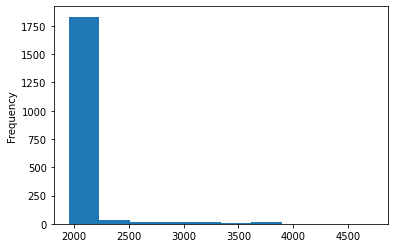

In [59]:
# посмотрим график тарифа 'ultra'
df[df['tariff'] == 'ultra']['total_paid'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

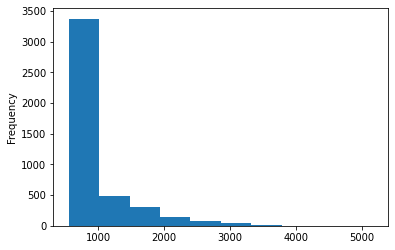

In [60]:
# посмотрим график тарифа 'smart'
df[df['tariff'] == 'smart']['total_paid'].plot(kind='hist', bins=10)

In [61]:
# создадим таблицу для понимания
df.groupby('tariff')\
  .agg({'total_paid':['median','mean','var','std']})\
  .style.format("{:.2f}")

In [62]:
# создадим таблицу для понимания
df.groupby('tariff')\
  .agg({'minutes_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Звонки в минутах в месяц')

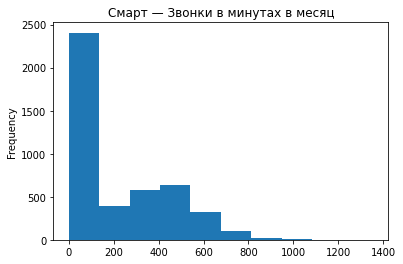

In [63]:
# создадим график смарт-звонков в месяц в минутах
import matplotlib.pyplot as plt
df[df['tariff'] == 'smart']['minutes_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — Звонки в минутах в месяц')

Text(0.5, 1.0, 'Ультра — Звонки в минутах в месяц')

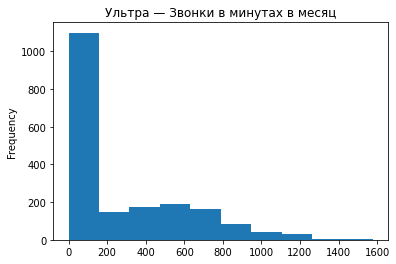

In [64]:
# создадим график ультро-звонков в месяц в минутах
df[df['tariff'] == 'ultra']['minutes_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — Звонки в минутах в месяц')

Можно наблюдать, что пользователи, которые используют тариф смарт в большей степени говорят 400-500 минут в месяц, а пользователи тарифа ультра говорят примерно по 500-620 минут в месяц. Это значит, что те люди, которые используют тариф смарт подходят к краю своего тарифа, а на ультре у пользователей остается в запасе еще 2500 минут. 

In [65]:
df.groupby('tariff')\
  .agg({'traffic_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

Text(0.5, 1.0, 'Смарт — Интернет в МБ в месяц')

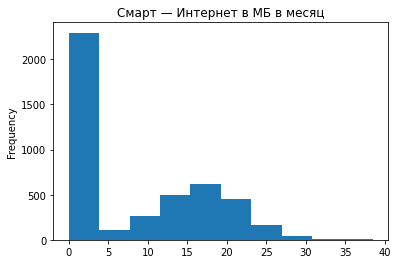

In [76]:
(df[df['tariff'] == 'smart']['traffic_in_month'] / 1000).plot(kind='hist', bins=10)
plt.title('Смарт — Интернет в МБ в месяц')

Text(0.5, 1.0, 'Ультра — Интернет в МБ в месяц')

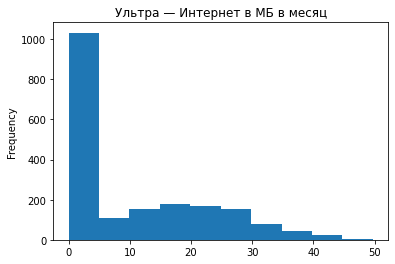

In [75]:
(df[df['tariff'] == 'ultra']['traffic_in_month'] / 1000).plot(kind='hist', bins=10)
plt.title('Ультра — Интернет в МБ в месяц')

Среднее и медиана на всех графиках леат рядом, логично наблюдать, что пользователи с тарифом смарт выходят за пределы тарифа (примерно 17,5 ГБ), у ультра опять запас в 10гб, но при этом наблюдается больший разброс.

In [ ]:
df.groupby('tariff')\
  .agg({'sms_in_month':['median','mean','var','std']})\
  .style.format("{:.2f}")

In [ ]:
df[df['tariff'] == 'smart']['sms_in_month'].plot(kind='hist', bins=10)
plt.title('Смарт — СМС в месяц')

In [ ]:
df[df['tariff'] == 'ultra']['sms_in_month'].plot(kind='hist', bins=10)
plt.title('Ультра — СМС в месяц')

Наблюдается схожесть в поведении пользователей, видим очень низкий спрос смс.

## Проверка гипотез.

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

In [ ]:
# Напишем функцию для удаления выбросов

def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

В работе понадобится t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается

H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [ ]:
df.head()

In [ ]:
ultra = df[df['tariff'] == 'ultra']
smart = df[df['tariff'] == 'smart']

In [ ]:
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [ ]:
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

In [ ]:
alpha = 0.05

In [ ]:
from scipy import stats as st
results = st.ttest_ind(ultra, smart)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Наблюдаются значимые различия между выборками, разница не случайна.

Гипотеза о равенстве средних двух генеральных совокупностей №2

Сформулируем гипотезы:

H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
df['city'].unique()

In [ ]:
import numpy as np
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [ ]:
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']

In [ ]:
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

In [ ]:
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [ ]:
results = st.ttest_ind(moscow, province)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Значимых различий не наблюдается, отвергаем нулевую гипотезу.

## Общий вывод:

Пользователи с разных тарифов ведут себя абсолютно по-разному. Можно выявить закономерность, что в тарифе смарт пользователи часто переплачивают, а это может плохо сказаться на доверии клиентов.

* На графиках отлично можно заметить, насколько смс-ки никому не нужны на обоих тарифах. В смарте люди близки к своим лимитам, в свою очередь как на ультре остаются большие неизрасходованные "запасы" — возможно, имеет смысл подумать, как использовать эту, по сути, упущенную выгоду
* Тарифы приносят разные деньги, значимые различия есть
* Деньги одинаково текут и из регионов и из Москвы, и вероятно это не связано с уровнем жизни.
* В результате выполнения проекта можно заявить, что тариф Ультра все равно будет приносить больше прибыли и его можно назвать лучшим
* Идеальным решением было бы сделать новый тариф, который по цене являлся бы промежуточным вариантом между текущими Смарт и Ультра, но был более доступным и включал бы в себя больше возможностей.